In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier



In [5]:
data=pd.read_excel("C:/Users/PRIYAL SOBTIPRIYAL.1/Documents/mlproject/dataset.xlsx")
print(data)

            Text Sentiment
0      different   Neutral
1      way to go   Neutral
2   this is good  positive
3      excellent  positive
4            bad  negative
5          worse  negative
6           neew   Neutral
7           nice  positive
8     ridiculuos  negative
9     disgusting  negative
10         great  positive
11     well done  positive
12          ohhh   neutral
13          what   neutral
14         weird  negative
15        heaven  positive
16           fab  positive


In [7]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.Sentiment != "Neutral"]

In [13]:
train_pos = train[ train['Sentiment'] == 'positive']
train_pos = train_pos['Text']
train_neg = train[ train['Sentiment'] == 'negative']
train_neg = train_neg['Text']

Positive words


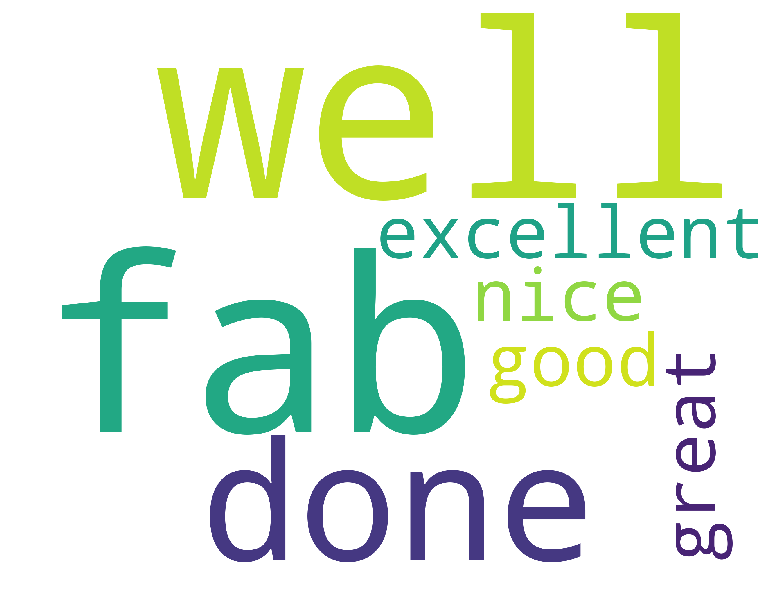

Negative words


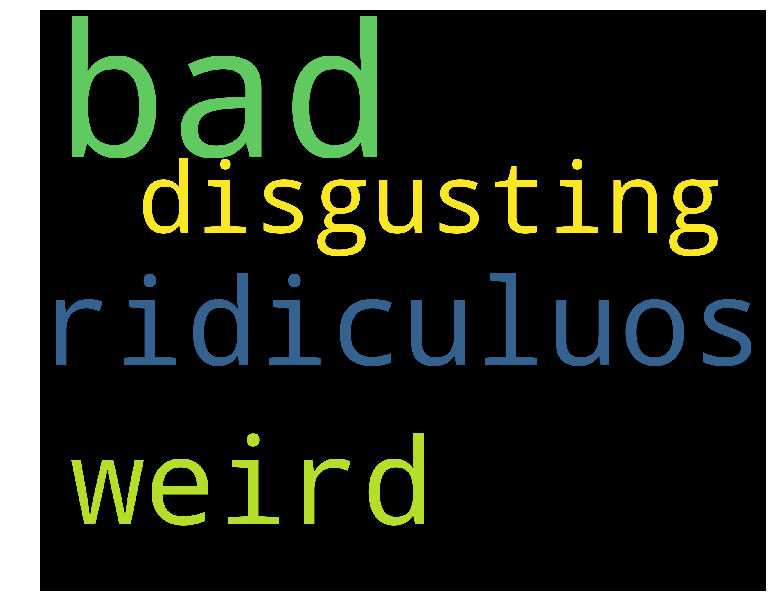

In [14]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)